<h1>Introduction</h1>

Creating a varaitional autoencoder model using the model sub classing  method in keras. The model is trained using the fashion mnist dataset from tensorflow dataset which contains pictures of shirts and shoes.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential, models


In [46]:
units = [32, 64, 128]
activations = ['relu', 'relu', 'relu', 'relu', 'relu']
latent_dim = 200

In [47]:
class latent_sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""
    def __init__(self, z_mean, z_log_var):
      super(latent_sampling, self).__init__()

      self.z_mean = z_mean
      self.z_log_var = z_log_var

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        z = z_mean + tf.exp(0.5 * z_log_var) * epsilon
        self.add_loss(-0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))) 
        self.add_metric(-0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)), name='kl_loss') 
        return z

In [48]:
#create encoder
class Encoder(keras.Model):
    def __init__(self, units, activations, 
               latent_dim, name="encoder", **kwargs):
    
        super(Encoder, self).__init__(name=name, **kwargs)
        self.units = units
        self.activations = activations
        self.latent_dim = latent_dim
        self.enc_conv1 = layers.Conv2D(self.units[0],
                                      (3, 3),
                                      padding='same',
                                      activation=self.activations[0],
                                      strides=(2,2),
                                      name='enc_conv_1'
                                      )
        self.enc_conv2 = layers.Conv2D(self.units[1],
                                        (3, 3),
                                        padding='same',
                                        activation=self.activations[1],
                                        strides=(2,2),
                                        name='enc_conv_2'
                                        )
        self.enc_conv3 = layers.Conv2D(self.units[1],
                                        (3, 3),
                                        activation=self.activations[2],
                                        padding='same',
                                        strides=(2,2),
                                        name='enc_conv_3'
                                        )
        self.enc_conv4 = layers.Conv2D(self.units[1],
                                        (3, 3),
                                        padding='same',
                                        activation=self.activations[3],
                                        strides=(2,2),
                                        name='enc_conv_4'
                                        )
        self.enc_conv5 = layers.Conv2D(self.units[2],
                                        (3,3),
                                        padding='same',
                                        activation=self.activations[4],
                                        strides=(2,2),
                                        name='enc_conv_5'
                                        )
        self.enc_conv6 = layers.Conv2D(self.units[2],
                                        (3, 3),
                                        padding='same',
                                        activation=self.activations[3],
                                        strides=(2,2),
                                        name='enc_conv_6'
                                        )
        self.enc_conv7 = layers.Conv2D(self.units[2],
                                        (3,3),
                                        padding='same',
                                        activation=self.activations[4],
                                        strides=(2,2),
                                        name='enc_conv_7'
                                        )
        self.flatten = layers.Flatten(name='enc_flat')


        self.z_mean = layers.Dense(self.latent_dim, name='z_mean')

        self.z_log_var = layers.Dense(self.latent_dim, name='z_log_var')

        self.z = latent_sampling(self.z_mean, self.z_log_var)




    def call(self, inputs):

        #x = self.inp(inputs)

        x = self.enc_conv1(inputs)
        x = self.enc_conv2(x)
        x = self.enc_conv3(x)
        x = self.enc_conv4(x)
        x = self.enc_conv5(x)
        x = self.enc_conv6(x)
        x = self.enc_conv7(x)
        x = self.flatten(x)
        z_mean = self.z_mean(x)
        z_log_var = self.z_log_var(x)
        z = self.z((z_mean, z_log_var))


        return z_mean, z_log_var, z


In [49]:
#create decoder
class Decoder(keras.Model):
    def __init__(self, units, activations,latent_dim,  name="decoder", **kwargs):
    
        super(Decoder, self).__init__(name=name, **kwargs)
        self.units = units
        self.activations = activations
        self.latent_dim = latent_dim

        



        self.dec_inp = layers.Dense(self.latent_dim, name='dec_input')

        self.dec_dense = layers.Dense(128, 
                                      activation=self.activations[4],
                                      name='dec_dense'
                                      )
        
        self.dec_reshape = layers.Reshape([1 ,1, 128], input_shape=(4096,),
                                          name='dec_reshape'
                                          )
        
        self.dec_convT_1 = layers.Conv2DTranspose(self.units[2],
                                                  (3,3),
                                                  padding='same',
                                                  activation=self.activations[4],
                                                  name='dec_conT_1'
                                                  ) 
        
        self.dec_convT_2 = layers.Conv2DTranspose(self.units[2],
                                                  (3,3),
                                                  padding='same',
                                                  activation=self.activations[3],
                                                  strides=(2,2),
                                                  name='dec_conT_2'
                                                  ) 
        
        self.dec_convT_3 = layers.Conv2DTranspose(self.units[2],
                                                  (3,3),
                                                  padding='same',
                                                  activation=self.activations[2],
                                                  strides=(2,2),
                                                  name='dec_conT_3'
                                                  ) 
        
        self.dec_convT_4 = layers.Conv2DTranspose(self.units[1],
                                                  (3,3),
                                                  padding='same',
                                                  activation=self.activations[1],
                                                  strides=(2,2),
                                                  name='dec_conT_4'
                                                  ) 
        
        self.dec_convT_5 = layers.Conv2DTranspose(self.units[1],
                                                  (3,3),
                                                  padding='same',
                                                  activation=self.activations[0],
                                                  strides=(2,2),
                                                  name='dec_conT_5'
                                                  )
        
        self.dec_convT_6 = layers.Conv2DTranspose(self.units[1],
                                                  (3,3),
                                                  padding='same',
                                                  activation=self.activations[1],
                                                  strides=(2,2),
                                                  name='dec_conT_6'
                                                  ) 
        
        self.dec_convT_7 = layers.Conv2DTranspose(self.units[0],
                                                  (3,3),
                                                  padding='same',
                                                  activation=self.activations[0],
                                                  strides=(2,2),
                                                  name='dec_conT_7'
                                                  ) 
        
        self.dec_out = layers.Conv2DTranspose(1,
                                              (3,3),
                                              padding='same',
                                              strides=(2,2),
                                              activation='relu',
                                              name='dec_out' 
                                              )
        
    def call(self, inputs):

       

        x = self.dec_inp(inputs)
        x = self.dec_dense(x)
        x = self.dec_reshape(x)
        x = self.dec_convT_1(x)
        x = self.dec_convT_2(x)
        x = self.dec_convT_3(x)
        x = self.dec_convT_4(x)

        x = self.dec_convT_5(x)
        x = self.dec_convT_6(x)
        x = self.dec_convT_7(x)


        return self.dec_out(x)


In [50]:
class Autoencoder(keras.Model):
    def __init__(self, name="autoencoder",
        **kwargs):
    
        super(Autoencoder, self).__init__(name=name, **kwargs)

        self.latent_dim = latent_dim


        self.Encoder = Encoder(units, activations, latent_dim)

        self.Decoder = Decoder(units, activations, latent_dim)

 


    

    def call(self, inputs):

        z_mean, z_log_var, z = self.Encoder(inputs)
        x = self.Decoder(z)

        

        return x


    


In [51]:
#image processing function
def img_process(features):
   

   
    image = tf.image.resize(features['image'], (128,128))
    image = tf.cast(image, 'float32')/255.
    return image, image

In [52]:
#download dataset
import tensorflow_datasets as tfds
train_ds, test_ds = tfds.load('fashion_mnist', split=['train[:10%]', 'test[:10%]'], download=True, shuffle_files=True)
train_ds = train_ds.map(img_process, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(img_process, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.prefetch(tf.data.AUTOTUNE).cache().batch(64, drop_remainder=True)
test_ds = test_ds.prefetch(tf.data.AUTOTUNE).cache().batch(64, drop_remainder=True)

In [53]:
def recon_loss(y_true, y_pred):
    recon = tf.reduce_sum(tf.square(y_true-y_pred), axis=(1,2,3))
    return tf.reduce_mean(recon)

In [21]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(64, 128, 128, 1), dtype=tf.float32, name=None), TensorSpec(shape=(64, 128, 128, 1), dtype=tf.float32, name=None))>

In [54]:
Epochs = 20

vae = Autoencoder()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

vae.compile(optimizer, loss=[recon_loss], metrics='mean_squared_error')
history = vae.fit(train_ds, epochs=Epochs)

Epoch 1/20
93/93 [==============================] - 6s 43ms/step - loss: 1507.5032 - mean_squared_error: 0.0903 - kl_loss: 28.3015
Epoch 2/20
93/93 [==============================] - 4s 44ms/step - loss: 1163.6104 - mean_squared_error: 0.0666 - kl_loss: 72.0115
Epoch 3/20
93/93 [==============================] - 4s 43ms/step - loss: 1114.0117 - mean_squared_error: 0.0629 - kl_loss: 83.0829
Epoch 4/20
93/93 [==============================] - 4s 43ms/step - loss: 1084.3037 - mean_squared_error: 0.0601 - kl_loss: 99.4956
Epoch 5/20
93/93 [==============================] - 5s 49ms/step - loss: 1052.1029 - mean_squared_error: 0.0567 - kl_loss: 123.6631
Epoch 6/20
93/93 [==============================] - 4s 39ms/step - loss: 1007.4366 - mean_squared_error: 0.0527 - kl_loss: 143.9890
Epoch 7/20
93/93 [==============================] - 4s 43ms/step - loss: 959.1174 - mean_squared_error: 0.0488 - kl_loss: 158.9731
Epoch 8/20
93/93 [==============================] - 4s 45ms/step - loss: 953.8021

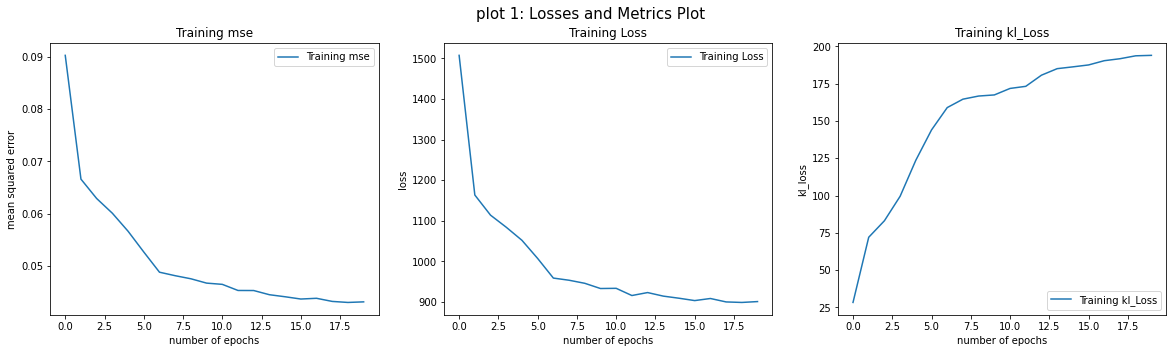

In [55]:
### Plot the losses and metrics. Comment on the figures in your report, with
### regard to how the training has proceeded.

mse = history.history['mean_squared_error']

loss = history.history['loss']

kl_loss = history.history['kl_loss']

epochs_range = range(Epochs)
plt.figure(figsize=(20,5))
plt.suptitle("plot 1: Losses and Metrics Plot", fontsize=15)
plt.subplot(1, 3, 1)
plt.plot(epochs_range, mse, label='Training mse')
plt.xlabel('number of epochs')
plt.ylabel('mean squared error')
plt.legend(loc='upper right')
plt.title('Training mse')

plt.subplot(1, 3, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.title('Training Loss')

plt.subplot(1, 3, 3)
plt.plot(epochs_range, kl_loss, label='Training kl_Loss')
plt.xlabel('number of epochs')
plt.ylabel('kl_loss')
plt.legend(loc='lower right')
plt.title('Training kl_Loss')
plt.show()

In [58]:
y_pred = vae.predict(test_ds)

15/15 [==============================] - 0s 26ms/step


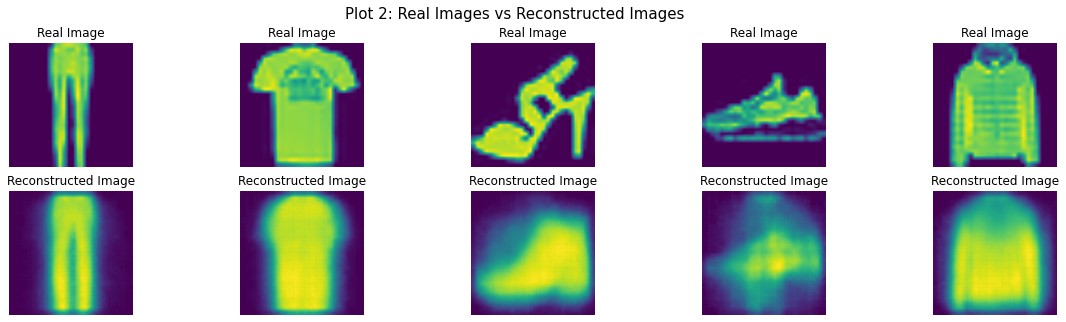

In [59]:
f, ax = plt.subplots(2, 5, figsize=(20,5))
for images, label in test_ds.take(1):
  for i in range(5):
    f.suptitle("Plot 2: Real Images vs Reconstructed Images", fontsize=15)
    ax[0,i].set_title('Real Image')
    ax[0,i].imshow(images[i+5,:,:,0])
    ax[0,i].axis("off")
for i in range(5):
  ax[1,i].set_title('Reconstructed Image') 
  ax[1,i].imshow(y_pred[i+5,:,:,0])
  ax[1,i].axis("off")
plt.show()